## Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

## Load Data

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
submission = pd.read_csv('./data/submission.csv')

## EDA

In [3]:
train

,id,digit,letter,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,1,5,L,1,1,1,4,3,0,0,...,2,1,0,1,2,4,4,4,3,4
1,2,0,B,0,4,0,0,4,1,1,...,0,3,0,1,4,1,4,2,1,2
2,3,4,L,1,1,2,2,1,1,1,...,3,3,3,0,2,0,3,0,2,2
3,4,9,D,1,2,0,2,0,4,0,...,3,3,2,0,1,4,0,0,1,1
4,5,6,A,3,0,2,4,0,3,0,...,4,4,3,2,1,3,4,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,2044,6,V,2,4,3,4,2,4,4,...,0,2,2,0,0,1,3,1,4,0
2044,2045,1,L,3,2,2,1,1,4,0,...,2,3,4,2,1,2,3,4,1,1
2045,2046,9,A,4,0,4,0,2,4,4,...,2,3,1,1,3,4,2,2,0,0
2046,2047,0,Z,2,3,3,0,3,0,4,...,2,3,1,1,0,4,1,4,3,1


In [4]:
test

,id,letter,0,1,2,3,4,5,6,7,...,774,775,776,777,778,779,780,781,782,783
0,2049,L,0,4,0,2,4,2,3,1,...,2,0,4,2,2,4,3,4,1,4
1,2050,C,4,1,4,0,1,1,0,2,...,0,3,2,4,2,4,2,2,1,2
2,2051,S,0,4,0,1,3,2,3,0,...,1,3,2,0,3,2,3,0,1,4
3,2052,K,2,1,3,3,3,4,3,0,...,3,0,3,2,4,1,0,4,4,4
4,2053,W,1,0,1,1,2,2,1,4,...,4,3,1,4,0,2,1,2,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20475,22524,P,1,2,1,1,0,0,0,2,...,0,1,3,0,3,0,4,3,1,4
20476,22525,S,4,1,1,4,0,0,1,1,...,1,3,1,0,0,1,3,1,2,0
20477,22526,B,4,2,1,3,2,1,3,0,...,3,2,3,4,1,0,3,3,1,1
20478,22527,K,1,1,2,3,4,0,4,3,...,2,0,0,4,3,3,3,4,4,2


In [5]:
pd.value_counts(train['letter'])

Z    91
K    90
O    90
H    89
L    89
G    87
M    86
Y    86
U    85
Q    82
T    82
R    81
F    80
X    79
N    77
S    76
D    76
C    74
V    73
A    72
B    71
W    69
J    67
P    66
E    66
I    64
Name: letter, dtype: int64

In [6]:
X_temp = np.array(train[[str(i) for i in range(784)]][:32])
X_temp = X_temp.reshape(-1,1,28,28)
X_temp.shape

(32, 1, 28, 28)

In [7]:
train_digit = train['digit'].values
X_train_letter = train['letter'].values
X_test_letter = test['letter'].values

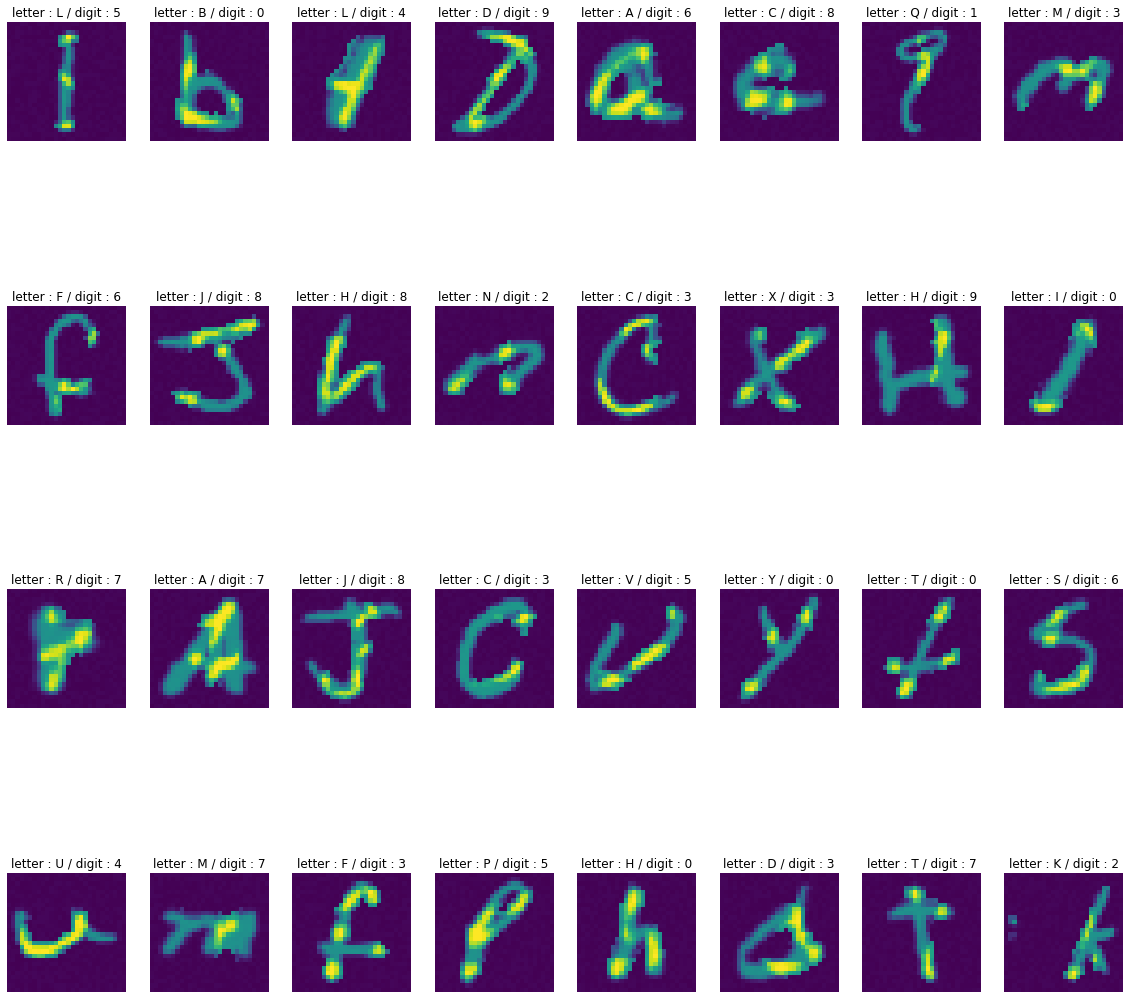

In [8]:
plt.figure(figsize=(20,20))
for idx, (image, digit, letter) in enumerate(zip(X_temp[:32], train_digit[:32] ,X_train_letter[:32])):
    plt.subplot(4,8,idx+1)
    plt.imshow(image[0])
    title = 'letter : {} / digit : {}'.format(letter, digit)
    plt.title(title, fontdict={'color':'black'})
    plt.axis('off')

## utility function

### graph

In [9]:
def plot_curve(epochs, hist, list_of_metrics):
    
    fig, ax = plt.subplots(1,2,figsize = (12, 8))
    
    for i in range(len(ax)):
        ax[i].set_xlabel('Epochs')
        ax[i].set_ylabel('Value')
        
        for n in range(len(list_of_metrics)):
            if i == 0:
                y = hist[list_of_metrics[n]]
                if n == 0:
                    ax[i].plot(epochs, y, label="train")
                else:
                    ax[i].plot(epochs, y, label="val")
                ax[i].set_title('Loss')
                ax[i].legend(loc='upper right')
                if n == 1:
                    break
            else:
                if n >= 2:
                    y = hist[list_of_metrics[n]]
                    if n == 2:
                        ax[i].plot(epochs, y, label="train")
                    else:
                        ax[i].plot(epochs, y, label="val")
                    ax[i].set_title('Accuracy')
                    ax[i].legend(loc='lower right')
                    
    plt.show()

### alphabet image

In [10]:
def digit_image(x):
    return np.where(x>=150, x, 0)

### alphabet one-hot encoding

In [11]:
def alpha_one_hot(x):
    label_encoder = LabelEncoder()
    onehot_encoder = OneHotEncoder(sparse=False)
    
    integer_encoded = label_encoder.fit_transform(x)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    
    x = onehot_encoder.fit_transform(integer_encoded)
    return x

## Dataset 

In [12]:
X_train = train.drop(['letter','id','digit'],axis=1)
X_test = test.drop(['letter','id'],axis=1)

In [13]:
X_trains = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)

In [14]:
X_trains.shape

(2048, 28, 28, 1)

In [15]:
X_test.shape

(20480, 28, 28, 1)

In [16]:
y_trains = train['digit']

In [17]:
y_trains = utils.to_categorical(y_trains, 10)

In [18]:
y_trains.shape

(2048, 10)

In [19]:
# X_train_letter = alpha_one_hot(X_train_letter)

In [20]:
# X_train_letter.shape

In [21]:
# y_train_letter = np.concatenate((y_train, X_train_letter), axis=1)

In [22]:
# y_train_letter.shape

In [23]:
# X_train, X_valid, y_train_letter, y_valid_letter = train_test_split(X_train, y_train_letter, test_size=0.2, random_state=2020, stratify=train['digit'])

In [24]:
# y_train = y_train_letter[:,:10]
# # y_valid = y_valid_letter[:,:10]

In [25]:
# X_train_letter = y_train_letter[:,10:]
# X_valid_letter = y_valid_letter[:,10:]

In [26]:
# X_train_letter

In [27]:
# X_train_letter = tf.convert_to_tensor(X_train_letter)
# X_valid_letter = tf.convert_to_tensor(X_valid_letter)

In [28]:
# X_train_digit = digit_image(X_train)
# X_valid_digit = digit_image(X_valid)

In [29]:
# X_train = X_train / 255.0
# X_valid = X_valid / 255.0
# X_train_digit = X_train_digit / 255.0
# X_valid_digit = X_valid_digit / 255.0

## Train

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Add, Input, Flatten, Dense, GlobalAveragePooling2D, Dropout, Conv2D, BatchNormalization, MaxPooling2D
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.losses import sparse_categorical_crossentropy

In [31]:
reduction_ratio=16

In [32]:
input_ = tf.keras.layers.Input(shape=(28,28,1))
# digit = tf.keras.layers.Input(shape=(28,28,1)) 
letter = tf.keras.layers.Input(shape=(26)) 



###########################################################################################
conv1 = tf.keras.layers.Conv2D(filters=128, kernel_size=(5,5), kernel_initializer='he_normal', activation='elu', padding='same',
                              kernel_constraint=tf.keras.constraints.max_norm(3.))(input_) #28x28x128


## Residual Unit1
batch1_1 = tf.keras.layers.BatchNormalization()(conv1)
elu1_1 = tf.keras.layers.ELU()(batch1_1)
res1_1 = tf.keras.layers.Conv2D(filters=32, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu1_1) 
batch1_2 = tf.keras.layers.BatchNormalization()(res1_1)
elu1_2 = tf.keras.layers.ELU()(batch1_2)
res1_2 = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu1_2) 
batch1_3 = tf.keras.layers.BatchNormalization()(res1_2)
elu1_3 = tf.keras.layers.ELU()(batch1_3)
res1_3 = tf.keras.layers.Conv2D(filters=128, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu1_3)                          

# SEBlock1
ch_input1 = 128
ch_reduced1 = ch_input1//reduction_ratio
avpool1 = tf.keras.layers.GlobalAveragePooling2D()(res1_3)
sed1_1 = tf.keras.layers.Dense(ch_reduced1, kernel_initializer='he_normal', activation='elu', use_bias=False)(avpool1)
sed1_2 = tf.keras.layers.Dense(ch_input1, kernel_initializer='he_normal', activation='sigmoid', use_bias=False)(sed1_1)
reshape1 = tf.keras.layers.Reshape((1,1,ch_input1))(sed1_2)
mul1 = tf.keras.layers.Multiply()([res1_3, reshape1])
#

skip1 = tf.keras.layers.Conv2D(filters=128, kernel_size=(1,1), padding='same')(conv1)
res1 = tf.keras.layers.Add()([mul1, skip1]) #28x28x128
##

## Residual Unit2
batch2_1 = tf.keras.layers.BatchNormalization()(res1)
elu2_1 = tf.keras.layers.ELU()(batch2_1)
res2_1 = tf.keras.layers.Conv2D(filters=32, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu2_1) 
batch2_2 = tf.keras.layers.BatchNormalization()(res2_1)
elu2_2 = tf.keras.layers.ELU()(batch2_2)
res2_2 = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu2_2) 
batch2_3 = tf.keras.layers.BatchNormalization()(res2_2)
elu2_3 = tf.keras.layers.ELU()(batch2_3)
res2_3 = tf.keras.layers.Conv2D(filters=128, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu2_3)                         


# SEBlock2
ch_input2 = 128
ch_reduced2 = ch_input2//reduction_ratio
avpool2 = tf.keras.layers.GlobalAveragePooling2D()(res2_3)
sed2_1 = tf.keras.layers.Dense(ch_reduced2, kernel_initializer='he_normal', activation='elu', use_bias=False)(avpool2)
sed2_2 = tf.keras.layers.Dense(ch_input2, kernel_initializer='he_normal', activation='sigmoid', use_bias=False)(sed2_1)
reshape2 = tf.keras.layers.Reshape((1,1,ch_input2))(sed2_2)
mul2 = tf.keras.layers.Multiply()([res2_3, reshape2])
#
skip2 = tf.keras.layers.Conv2D(filters=128, kernel_size=(1,1), padding='same')(res1)
res2 = tf.keras.layers.Add()([mul2, skip2])
drop2 = tf.keras.layers.Dropout(0.3)(res2) # 28x28x128
##


## Residual Unit3
batch3_1 = tf.keras.layers.BatchNormalization()(drop2)
elu3_1 = tf.keras.layers.ELU()(batch3_1)
res3_1 = tf.keras.layers.Conv2D(filters=64, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu3_1) 
batch3_2 = tf.keras.layers.BatchNormalization()(res3_1)
elu3_2 = tf.keras.layers.ELU()(batch3_2)
res3_2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu3_2) 
batch3_3 = tf.keras.layers.BatchNormalization()(res3_2)
elu3_3 = tf.keras.layers.ELU()(batch3_3)
res3_3 = tf.keras.layers.Conv2D(filters=128, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu3_3)                           


# SEBlock3
ch_input3 = 128
ch_reduced3 = ch_input3//reduction_ratio
avpool3 = tf.keras.layers.GlobalAveragePooling2D()(res3_3)
sed3_1 = tf.keras.layers.Dense(ch_reduced3, kernel_initializer='he_normal', activation='elu', use_bias=False)(avpool3)
sed3_2 = tf.keras.layers.Dense(ch_input3, kernel_initializer='he_normal', activation='sigmoid', use_bias=False)(sed3_1)
reshape3 = tf.keras.layers.Reshape((1,1,ch_input3))(sed3_2)
mul3 = tf.keras.layers.Multiply()([res3_3, reshape3])
#
skip3 = tf.keras.layers.Conv2D(filters=128, kernel_size=(1,1),padding='same')(drop2)
res3 = tf.keras.layers.Add()([mul3, skip3]) #28x28x128
##


## Residual Unit4
batch4_1 = tf.keras.layers.BatchNormalization()(res3)
elu4_1 = tf.keras.layers.ELU()(batch4_1)
res4_1 = tf.keras.layers.Conv2D(filters=64, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu4_1) 
batch4_2 = tf.keras.layers.BatchNormalization()(res4_1)
elu4_2 = tf.keras.layers.ELU()(batch4_2)
res4_2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu4_2) 
batch4_3 = tf.keras.layers.BatchNormalization()(res4_2)
elu4_3 = tf.keras.layers.ELU()(batch4_3)
res4_3 = tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu4_3)                              


# SEBlock4
ch_input4 = 256
ch_reduced4 = ch_input4//reduction_ratio
avpool4 = tf.keras.layers.GlobalAveragePooling2D()(res4_3)
sed4_1 = tf.keras.layers.Dense(ch_reduced4, kernel_initializer='he_normal', activation='elu', use_bias=False)(avpool4)
sed4_2 = tf.keras.layers.Dense(ch_input4, kernel_initializer='he_normal', activation='sigmoid', use_bias=False)(sed4_1)
reshape4 = tf.keras.layers.Reshape((1,1,ch_input4))(sed4_2)
mul4 = tf.keras.layers.Multiply()([res4_3, reshape4])
#
skip4 = tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1),padding='same')(res3)
res4 = tf.keras.layers.Add()([mul4, skip4])
pool4 = tf.keras.layers.MaxPool2D((2,2))(res4)
drop4 = tf.keras.layers.Dropout(0.3)(pool4) # 14x14x256
##


## Residual Unit5
batch5_1 = tf.keras.layers.BatchNormalization()(drop4)
elu5_1 = tf.keras.layers.ELU()(batch5_1)
res5_1 = tf.keras.layers.Conv2D(filters=64, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu5_1) 
batch5_2 = tf.keras.layers.BatchNormalization()(res5_1)
elu5_2 = tf.keras.layers.ELU()(batch5_2)
res5_2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu5_2) 
batch5_3 = tf.keras.layers.BatchNormalization()(res5_2)
elu5_3 = tf.keras.layers.ELU()(batch5_3)
res5_3 = tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu5_3)                                 


# SEBlock5
ch_input5 = 256
ch_reduced5 = ch_input5//reduction_ratio
avpool5 = tf.keras.layers.GlobalAveragePooling2D()(res5_3)
sed5_1 = tf.keras.layers.Dense(ch_reduced5, kernel_initializer='he_normal', activation='elu', use_bias=False)(avpool5)
sed5_2 = tf.keras.layers.Dense(ch_input5, kernel_initializer='he_normal', activation='sigmoid', use_bias=False)(sed5_1)
reshape5 = tf.keras.layers.Reshape((1,1,ch_input5))(sed5_2)
mul5 = tf.keras.layers.Multiply()([res5_3, reshape5])
#
skip5 = tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1),padding='same')(drop4)
res5 = tf.keras.layers.Add()([mul5, skip5])
pool5 = tf.keras.layers.MaxPool2D((2,2))(res5) #7x7x256
##


## Residual Unit6
batch6_1 = tf.keras.layers.BatchNormalization()(pool5)
elu6_1 = tf.keras.layers.ELU()(batch6_1)
res6_1 = tf.keras.layers.Conv2D(filters=64, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu6_1) 
batch6_2 = tf.keras.layers.BatchNormalization()(res6_1)
elu6_2 = tf.keras.layers.ELU()(batch6_2)
res6_2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu6_2) 
batch6_3 = tf.keras.layers.BatchNormalization()(res6_2)
elu6_3 = tf.keras.layers.ELU()(batch6_3)
res6_3 = tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu6_3)
# SEBlock6
ch_input6 = 256
ch_reduced6 = ch_input6//reduction_ratio
avpool6 = tf.keras.layers.GlobalAveragePooling2D()(res6_3)
sed6_1 = tf.keras.layers.Dense(ch_reduced6, kernel_initializer='he_normal', activation='elu', use_bias=False)(avpool6)
sed6_2 = tf.keras.layers.Dense(ch_input6, kernel_initializer='he_normal', activation='sigmoid', use_bias=False)(sed6_1)
reshape6 = tf.keras.layers.Reshape((1,1,ch_input6))(sed6_2)
mul6 = tf.keras.layers.Multiply()([res6_3, reshape6])
#
skip6 = tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1),padding='same')(pool5)
res6 = tf.keras.layers.Add()([mul6, skip6])
drop6 = tf.keras.layers.Dropout(0.3)(res6) # 7x7x256
##

## Residual Unit7
batch7_1 = tf.keras.layers.BatchNormalization()(drop6)
elu7_1 = tf.keras.layers.ELU()(batch7_1)
res7_1 = tf.keras.layers.Conv2D(filters=64, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu7_1) 
batch7_2 = tf.keras.layers.BatchNormalization()(res7_1)
elu7_2 = tf.keras.layers.ELU()(batch7_2)
res7_2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu7_2) 
batch7_3 = tf.keras.layers.BatchNormalization()(res7_2)
elu7_3 = tf.keras.layers.ELU()(batch7_3)
res7_3 = tf.keras.layers.Conv2D(filters=512, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu7_3)
skip7 = tf.keras.layers.Conv2D(filters=512, kernel_size=(1,1),padding='same')(drop6)
res7 = tf.keras.layers.Add()([res7_3, skip7])
pool7 = tf.keras.layers.MaxPool2D((3,3))(res7) # 2x2x512
############################################################################################


# ###########################################################################################
# conv1_digit = tf.keras.layers.Conv2D(filters=128, kernel_size=(5,5), kernel_initializer='he_normal', activation='elu', padding='same',
#                               kernel_constraint=tf.keras.constraints.max_norm(3.))(digit) #28x28x128


# ## Residual Unit1
# batch1_1_digit = tf.keras.layers.BatchNormalization()(conv1_digit)
# elu1_1_digit = tf.keras.layers.ELU()(batch1_1_digit)
# res1_1_digit = tf.keras.layers.Conv2D(filters=32, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu1_1_digit) 
# batch1_2_digit = tf.keras.layers.BatchNormalization()(res1_1_digit)
# elu1_2_digit = tf.keras.layers.ELU()(batch1_2_digit)
# res1_2_digit = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu1_2_digit) 
# batch1_3_digit = tf.keras.layers.BatchNormalization()(res1_2_digit)
# elu1_3_digit = tf.keras.layers.ELU()(batch1_3_digit)
# res1_3_digit = tf.keras.layers.Conv2D(filters=128, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu1_3_digit)                          

# # SEBlock1
# ch_input1_digit = 128
# ch_reduced1_digit = ch_input1_digit//reduction_ratio
# avpool1_digit = tf.keras.layers.GlobalAveragePooling2D()(res1_3_digit)
# sed1_1_digit = tf.keras.layers.Dense(ch_reduced1_digit, kernel_initializer='he_normal', activation='elu', use_bias=False)(avpool1_digit)
# sed1_2_digit = tf.keras.layers.Dense(ch_input1_digit, kernel_initializer='he_normal', activation='sigmoid', use_bias=False)(sed1_1_digit)
# reshape1_digit = tf.keras.layers.Reshape((1,1,ch_input1_digit))(sed1_2_digit)
# mul1_digit = tf.keras.layers.Multiply()([res1_3_digit, reshape1_digit])
# #

# skip1_digit = tf.keras.layers.Conv2D(filters=128, kernel_size=(1,1), padding='same')(conv1_digit)
# res1_digit = tf.keras.layers.Add()([mul1_digit, skip1_digit]) #28x28x128
# ##

# ## Residual Unit2
# batch2_1_digit = tf.keras.layers.BatchNormalization()(res1_digit)
# elu2_1_digit = tf.keras.layers.ELU()(batch2_1_digit)
# res2_1_digit = tf.keras.layers.Conv2D(filters=32, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu2_1_digit) 
# batch2_2_digit = tf.keras.layers.BatchNormalization()(res2_1_digit)
# elu2_2_digit = tf.keras.layers.ELU()(batch2_2_digit)
# res2_2_digit = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu2_2_digit) 
# batch2_3_digit = tf.keras.layers.BatchNormalization()(res2_2_digit)
# elu2_3_digit = tf.keras.layers.ELU()(batch2_3_digit)
# res2_3_digit = tf.keras.layers.Conv2D(filters=128, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu2_3_digit)                         


# # SEBlock2
# ch_input2_digit = 128
# ch_reduced2_digit = ch_input2_digit//reduction_ratio
# avpool2_digit = tf.keras.layers.GlobalAveragePooling2D()(res2_3_digit)
# sed2_1_digit = tf.keras.layers.Dense(ch_reduced2_digit, kernel_initializer='he_normal', activation='elu', use_bias=False)(avpool2_digit)
# sed2_2_digit = tf.keras.layers.Dense(ch_input2_digit, kernel_initializer='he_normal', activation='sigmoid', use_bias=False)(sed2_1_digit)
# reshape2_digit = tf.keras.layers.Reshape((1,1,ch_input2_digit))(sed2_2_digit)
# mul2_digit = tf.keras.layers.Multiply()([res2_3_digit, reshape2_digit])
# #
# skip2_digit = tf.keras.layers.Conv2D(filters=128, kernel_size=(1,1), padding='same')(res1_digit)
# res2_digit = tf.keras.layers.Add()([mul2_digit, skip2_digit])
# drop2_digit = tf.keras.layers.Dropout(0.3)(res2_digit) # 28x28x128
# ##


# ## Residual Unit3
# batch3_1_digit = tf.keras.layers.BatchNormalization()(drop2_digit)
# elu3_1_digit = tf.keras.layers.ELU()(batch3_1_digit)
# res3_1_digit = tf.keras.layers.Conv2D(filters=64, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu3_1_digit) 
# batch3_2_digit = tf.keras.layers.BatchNormalization()(res3_1_digit)
# elu3_2_digit = tf.keras.layers.ELU()(batch3_2_digit)
# res3_2_digit = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu3_2_digit) 
# batch3_3_digit = tf.keras.layers.BatchNormalization()(res3_2_digit)
# elu3_3_digit = tf.keras.layers.ELU()(batch3_3_digit)
# res3_3_digit = tf.keras.layers.Conv2D(filters=128, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu3_3_digit)                           


# # SEBlock3
# ch_input3_digit = 128
# ch_reduced3_digit = ch_input3_digit//reduction_ratio
# avpool3_digit = tf.keras.layers.GlobalAveragePooling2D()(res3_3_digit)
# sed3_1_digit = tf.keras.layers.Dense(ch_reduced3_digit, kernel_initializer='he_normal', activation='elu', use_bias=False)(avpool3_digit)
# sed3_2_digit = tf.keras.layers.Dense(ch_input3_digit, kernel_initializer='he_normal', activation='sigmoid', use_bias=False)(sed3_1_digit)
# reshape3_digit = tf.keras.layers.Reshape((1,1,ch_input3_digit))(sed3_2_digit)
# mul3_digit = tf.keras.layers.Multiply()([res3_3_digit, reshape3_digit])
# #
# skip3_digit = tf.keras.layers.Conv2D(filters=128, kernel_size=(1,1),padding='same')(drop2_digit)
# res3_digit = tf.keras.layers.Add()([mul3_digit, skip3_digit]) #28x28x128
# ##


# ## Residual Unit4
# batch4_1_digit = tf.keras.layers.BatchNormalization()(res3_digit)
# elu4_1_digit = tf.keras.layers.ELU()(batch4_1_digit)
# res4_1_digit = tf.keras.layers.Conv2D(filters=64, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu4_1_digit) 
# batch4_2_digit = tf.keras.layers.BatchNormalization()(res4_1_digit)
# elu4_2_digit = tf.keras.layers.ELU()(batch4_2_digit)
# res4_2_digit = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu4_2_digit) 
# batch4_3_digit = tf.keras.layers.BatchNormalization()(res4_2_digit)
# elu4_3_digit = tf.keras.layers.ELU()(batch4_3_digit)
# res4_3_digit = tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu4_3_digit)                              


# # SEBlock4
# ch_input4_digit = 256
# ch_reduced4_digit = ch_input4_digit//reduction_ratio
# avpool4_digit = tf.keras.layers.GlobalAveragePooling2D()(res4_3_digit)
# sed4_1_digit = tf.keras.layers.Dense(ch_reduced4_digit, kernel_initializer='he_normal', activation='elu', use_bias=False)(avpool4_digit)
# sed4_2_digit = tf.keras.layers.Dense(ch_input4_digit, kernel_initializer='he_normal', activation='sigmoid', use_bias=False)(sed4_1_digit)
# reshape4_digit = tf.keras.layers.Reshape((1,1,ch_input4_digit))(sed4_2_digit)
# mul4_digit = tf.keras.layers.Multiply()([res4_3_digit, reshape4_digit])
# #
# skip4_digit = tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1),padding='same')(res3_digit)
# res4_digit = tf.keras.layers.Add()([mul4_digit, skip4_digit])
# pool4_digit = tf.keras.layers.MaxPool2D((2,2))(res4_digit)
# drop4_digit = tf.keras.layers.Dropout(0.3)(pool4_digit) # 14x14x256
# ##


# ## Residual Unit5
# batch5_1_digit = tf.keras.layers.BatchNormalization()(drop4_digit)
# elu5_1_digit = tf.keras.layers.ELU()(batch5_1_digit)
# res5_1_digit = tf.keras.layers.Conv2D(filters=64, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu5_1_digit) 
# batch5_2_digit = tf.keras.layers.BatchNormalization()(res5_1_digit)
# elu5_2_digit = tf.keras.layers.ELU()(batch5_2_digit)
# res5_2_digit = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu5_2_digit) 
# batch5_3_digit = tf.keras.layers.BatchNormalization()(res5_2_digit)
# elu5_3_digit = tf.keras.layers.ELU()(batch5_3_digit)
# res5_3_digit = tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu5_3_digit)                                 


# # SEBlock5
# ch_input5_digit = 256
# ch_reduced5_digit = ch_input5_digit//reduction_ratio
# avpool5_digit = tf.keras.layers.GlobalAveragePooling2D()(res5_3_digit)
# sed5_1_digit = tf.keras.layers.Dense(ch_reduced5_digit, kernel_initializer='he_normal', activation='elu', use_bias=False)(avpool5_digit)
# sed5_2_digit = tf.keras.layers.Dense(ch_input5_digit, kernel_initializer='he_normal', activation='sigmoid', use_bias=False)(sed5_1_digit)
# reshape5_digit = tf.keras.layers.Reshape((1,1,ch_input5_digit))(sed5_2_digit)
# mul5_digit = tf.keras.layers.Multiply()([res5_3_digit, reshape5_digit])
# #
# skip5_digit = tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1),padding='same')(drop4_digit)
# res5_digit = tf.keras.layers.Add()([mul5_digit, skip5_digit])
# pool5_digit = tf.keras.layers.MaxPool2D((2,2))(res5_digit) #7x7x256
# ##


# ## Residual Unit6
# batch6_1_digit = tf.keras.layers.BatchNormalization()(pool5_digit)
# elu6_1_digit = tf.keras.layers.ELU()(batch6_1_digit)
# res6_1_digit = tf.keras.layers.Conv2D(filters=64, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu6_1_digit)
# batch6_2_digit = tf.keras.layers.BatchNormalization()(res6_1_digit)
# elu6_2_digit = tf.keras.layers.ELU()(batch6_2_digit)
# res6_2_digit = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu6_2_digit) 
# batch6_3_digit = tf.keras.layers.BatchNormalization()(res6_2_digit)
# elu6_3_digit = tf.keras.layers.ELU()(batch6_3_digit)
# res6_3_digit = tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu6_3_digit)
# # SEBlock6
# ch_input6_digit = 256
# ch_reduced6_digit = ch_input6_digit//reduction_ratio
# avpool6_digit = tf.keras.layers.GlobalAveragePooling2D()(res6_3_digit)
# sed6_1_digit = tf.keras.layers.Dense(ch_reduced6_digit, kernel_initializer='he_normal', activation='elu', use_bias=False)(avpool6_digit)
# sed6_2_digit = tf.keras.layers.Dense(ch_input6_digit, kernel_initializer='he_normal', activation='sigmoid', use_bias=False)(sed6_1_digit)
# reshape6_digit = tf.keras.layers.Reshape((1,1,ch_input6_digit))(sed6_2_digit)
# mul6_digit = tf.keras.layers.Multiply()([res6_3_digit, reshape6_digit])
# #
# skip6_digit = tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1),padding='same')(pool5_digit)
# res6_digit = tf.keras.layers.Add()([mul6_digit, skip6_digit])
# drop6_digit = tf.keras.layers.Dropout(0.3)(res6_digit) # 7x7x256
# ##

# ## Residual Unit7
# batch7_1_digit = tf.keras.layers.BatchNormalization()(drop6_digit)
# elu7_1_digit = tf.keras.layers.ELU()(batch7_1_digit)
# res7_1_digit = tf.keras.layers.Conv2D(filters=64, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu7_1_digit) 
# batch7_2_digit = tf.keras.layers.BatchNormalization()(res7_1_digit)
# elu7_2_digit = tf.keras.layers.ELU()(batch7_2_digit)
# res7_2_digit = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu7_2_digit) 
# batch7_3_digit = tf.keras.layers.BatchNormalization()(res7_2_digit)
# elu7_3_digit = tf.keras.layers.ELU()(batch7_3_digit)
# res7_3_digit = tf.keras.layers.Conv2D(filters=512, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu7_3_digit)
# skip7_digit = tf.keras.layers.Conv2D(filters=512, kernel_size=(1,1),padding='same')(drop6_digit)
# res7_digit = tf.keras.layers.Add()([res7_3_digit, skip7_digit])
# pool7_digit = tf.keras.layers.MaxPool2D((3,3))(res7_digit) # 2x2x512
# ############################################################################################





## Classification Unit
flatten1 = tf.keras.layers.Flatten()(pool7)
# flatten2 = tf.keras.layers.Flatten()(pool7_digit)
# flatten3 = tf.keras.layers.Flatten(lettertter)
# gmp1 = tf.keras.layers.GlobalAveragePooling2D()(pool7)
# gmp2 = tf.keras.layers.GlobalAveragePooling2D()(pool7_digit)
# gmp3 = tf.keras.layers.GlobalAveragePooling2D()(letter)
# con = tf.concat([flatten1, flatten2, letter], axis=1)
# con = tf.keras.layers.Concatenate(axis=-1)([flatten1, flatten2, flatten3])
# con = tf.keras.layers.Concatenate(axis=-1)([gmp1, gmp2])
# con_letter = tf.concat([con_image, flatten3], axis=1)

# dense1 = tf.keras.layers.Dense(1024, activation='elu', kernel_initializer='he_normal', kernel_constraint=tf.keras.constraints.max_norm(3.))(con)
# dense1 = tf.keras.layers.Dense(1024, activation='elu', kernel_initializer='he_normal', kernel_constraint=tf.keras.constraints.max_norm(3.))(flatten1)
dense1 = tf.keras.layers.Dense(1024, activation='elu', kernel_initializer='he_normal', kernel_constraint=tf.keras.constraints.max_norm(3.))(flatten1)
# con = tf.keras.layers.Concatenate()([dense1, letter])
drop10 = tf.keras.layers.Dropout(0.5)(dense1)
output = tf.keras.layers.Dense(10 ,activation='softmax')(drop10)
# output = tf.keras.layers.Dense(10 ,activation='softmax')(con)

In [33]:
# cnn_model.summary()

In [34]:
# lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
#     monitor='val_loss', factor=0.7, patience=20)

In [35]:
# checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
#         "test_{}.h5".format(num), save_best_only=True, monitor='val_accuracy', mode='auto')

In [36]:
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 30, restore_best_weights = True)

In [37]:
# model.compile(loss='categorical_crossentropy', optimizer=Adam(
#     lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07), metrics=['accuracy'])

In [38]:
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    fill_mode='nearest'
)
datagen.fit(X_trains)

In [39]:
epochs=500
batch_size = 32
num_model = 10

model_1
-------------------------------------------------------------------------------------------------------------------------
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/500
51/51 [==============================] - 34s 671ms/step - loss: 5.0928 - accuracy: 0.1115 - val_loss: 2.4790 - val_accuracy: 0.1146 - lr: 0.0010
Epoch 2/500
51/51 [==============================] - 2s 44ms/step - loss: 3.0077 - accuracy: 0.1059 - val_loss: 3.4935 - val_accuracy: 0.0976 - lr: 0.0010
Epoch 3/500
51/51 [==============================] - 2s 42ms/step - loss: 2.9047 - accuracy: 0.1059 - val_loss: 7.2017 - val_accuracy: 0.0976 - lr: 0.0010
Epoch 4/500
51/51 [==============================] - 2s 47ms/step - loss: 2.8635 - accuracy: 0.1339 - val_loss: 3.5822 - val_accuracy: 0.1317 - lr: 0.0010
Epoch 5/500
51/51 [==============================] - 2s 42ms/step - loss: 2.8925 - accuracy: 0.1283 - val_loss: 5.8158 - val_accuracy: 0.0976 - lr: 0.0010
Epoch 6/500
51/51

51/51 [==============================] - 2s 42ms/step - loss: 1.4826 - accuracy: 0.5012 - val_loss: 1.0311 - val_accuracy: 0.6634 - lr: 0.0010
Epoch 52/500
51/51 [==============================] - 2s 42ms/step - loss: 1.4873 - accuracy: 0.4888 - val_loss: 1.1360 - val_accuracy: 0.6439 - lr: 0.0010
Epoch 53/500
51/51 [==============================] - 2s 47ms/step - loss: 1.4692 - accuracy: 0.5086 - val_loss: 0.9606 - val_accuracy: 0.6902 - lr: 0.0010
Epoch 54/500
51/51 [==============================] - 2s 47ms/step - loss: 1.4130 - accuracy: 0.5330 - val_loss: 0.8971 - val_accuracy: 0.7049 - lr: 0.0010
Epoch 55/500
51/51 [==============================] - 2s 47ms/step - loss: 1.4065 - accuracy: 0.5336 - val_loss: 0.9564 - val_accuracy: 0.7171 - lr: 0.0010
Epoch 56/500
51/51 [==============================] - 2s 42ms/step - loss: 1.5595 - accuracy: 0.4844 - val_loss: 1.6410 - val_accuracy: 0.4976 - lr: 0.0010
Epoch 57/500
51/51 [==============================] - 2s 42ms/step - loss: 1.

51/51 [==============================] - 2s 42ms/step - loss: 1.0188 - accuracy: 0.6613 - val_loss: 0.5809 - val_accuracy: 0.8098 - lr: 7.0000e-04
Epoch 104/500
51/51 [==============================] - 2s 42ms/step - loss: 0.9321 - accuracy: 0.6955 - val_loss: 0.5682 - val_accuracy: 0.8244 - lr: 7.0000e-04
Epoch 105/500
51/51 [==============================] - 2s 42ms/step - loss: 0.9015 - accuracy: 0.7004 - val_loss: 0.5980 - val_accuracy: 0.7976 - lr: 7.0000e-04
Epoch 106/500
51/51 [==============================] - 2s 42ms/step - loss: 0.9807 - accuracy: 0.6893 - val_loss: 0.7051 - val_accuracy: 0.7805 - lr: 7.0000e-04
Epoch 107/500
51/51 [==============================] - 2s 42ms/step - loss: 0.9203 - accuracy: 0.6874 - val_loss: 0.6268 - val_accuracy: 0.8171 - lr: 7.0000e-04
Epoch 108/500
51/51 [==============================] - 2s 42ms/step - loss: 0.9581 - accuracy: 0.6706 - val_loss: 0.6090 - val_accuracy: 0.8171 - lr: 7.0000e-04
Epoch 109/500
51/51 [===========================

Epoch 154/500
51/51 [==============================] - 2s 42ms/step - loss: 0.7199 - accuracy: 0.7597 - val_loss: 0.6739 - val_accuracy: 0.7902 - lr: 4.9000e-04
Epoch 155/500
51/51 [==============================] - 2s 42ms/step - loss: 0.6503 - accuracy: 0.7827 - val_loss: 0.5015 - val_accuracy: 0.8561 - lr: 4.9000e-04
Epoch 156/500
51/51 [==============================] - 2s 42ms/step - loss: 0.7380 - accuracy: 0.7559 - val_loss: 0.6472 - val_accuracy: 0.8220 - lr: 4.9000e-04
Epoch 157/500
51/51 [==============================] - 2s 43ms/step - loss: 0.6530 - accuracy: 0.7770 - val_loss: 0.8053 - val_accuracy: 0.7854 - lr: 4.9000e-04
Epoch 158/500
51/51 [==============================] - 2s 43ms/step - loss: 0.7037 - accuracy: 0.7690 - val_loss: 0.5064 - val_accuracy: 0.8537 - lr: 4.9000e-04
Epoch 159/500
51/51 [==============================] - 2s 42ms/step - loss: 0.7305 - accuracy: 0.7677 - val_loss: 0.4920 - val_accuracy: 0.8366 - lr: 4.9000e-04
Epoch 160/500
51/51 [=============

Epoch 205/500
51/51 [==============================] - 2s 42ms/step - loss: 0.4870 - accuracy: 0.8425 - val_loss: 0.5225 - val_accuracy: 0.8634 - lr: 3.4300e-04
Epoch 206/500
51/51 [==============================] - 2s 42ms/step - loss: 0.5257 - accuracy: 0.8269 - val_loss: 0.5210 - val_accuracy: 0.8610 - lr: 3.4300e-04
Epoch 207/500
51/51 [==============================] - 2s 42ms/step - loss: 0.4874 - accuracy: 0.8288 - val_loss: 0.6585 - val_accuracy: 0.8439 - lr: 3.4300e-04
Epoch 208/500
51/51 [==============================] - 2s 41ms/step - loss: 0.4930 - accuracy: 0.8300 - val_loss: 0.6232 - val_accuracy: 0.8634 - lr: 3.4300e-04
Epoch 209/500
51/51 [==============================] - 2s 42ms/step - loss: 0.5019 - accuracy: 0.8339 - val_loss: 0.5456 - val_accuracy: 0.8610 - lr: 3.4300e-04
Epoch 210/500
51/51 [==============================] - 2s 43ms/step - loss: 0.5046 - accuracy: 0.8319 - val_loss: 0.6145 - val_accuracy: 0.8561 - lr: 2.4010e-04
Epoch 211/500
51/51 [=============

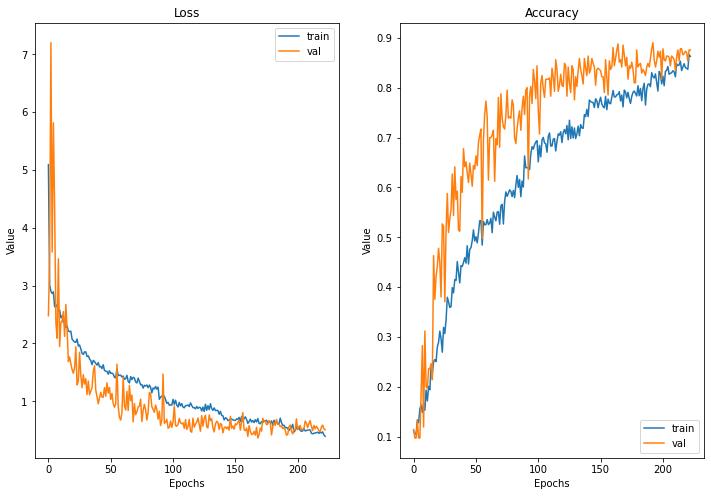

model_2
-------------------------------------------------------------------------------------------------------------------------
Epoch 1/500
51/51 [==============================] - 3s 54ms/step - loss: 0.8810 - accuracy: 0.7102 - val_loss: 0.8953 - val_accuracy: 0.7610 - lr: 0.0010
Epoch 2/500
51/51 [==============================] - 2s 43ms/step - loss: 0.8249 - accuracy: 0.7223 - val_loss: 1.2764 - val_accuracy: 0.7098 - lr: 0.0010
Epoch 3/500
51/51 [==============================] - 2s 49ms/step - loss: 0.9996 - accuracy: 0.6818 - val_loss: 0.5709 - val_accuracy: 0.8146 - lr: 0.0010
Epoch 4/500
51/51 [==============================] - 2s 42ms/step - loss: 0.9379 - accuracy: 0.6943 - val_loss: 0.6699 - val_accuracy: 0.8049 - lr: 0.0010
Epoch 5/500
51/51 [==============================] - 2s 47ms/step - loss: 0.8566 - accuracy: 0.7279 - val_loss: 0.5933 - val_accuracy: 0.8293 - lr: 0.0010
Epoch 6/500
51/51 [==============================] - 2s 42ms/step - loss: 0.8938 - accuracy: 0.

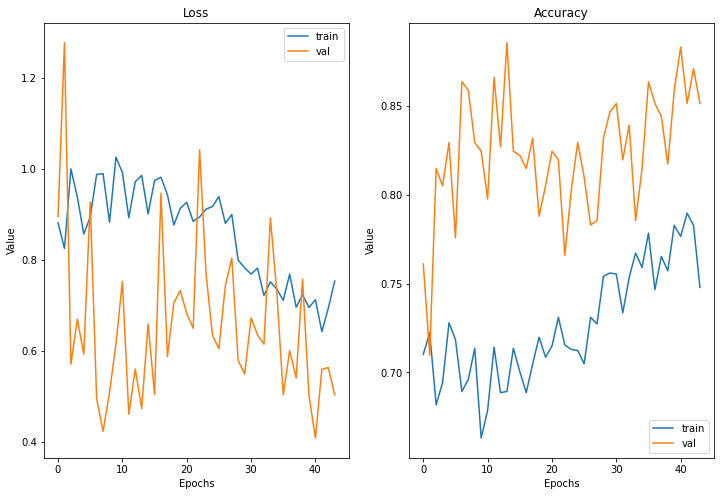

model_3
-------------------------------------------------------------------------------------------------------------------------
Epoch 1/500
51/51 [==============================] - 3s 55ms/step - loss: 0.9650 - accuracy: 0.7114 - val_loss: 0.4897 - val_accuracy: 0.8463 - lr: 0.0010
Epoch 2/500
51/51 [==============================] - 2s 48ms/step - loss: 0.9473 - accuracy: 0.6993 - val_loss: 0.3365 - val_accuracy: 0.8976 - lr: 0.0010
Epoch 3/500
51/51 [==============================] - 2s 42ms/step - loss: 0.9738 - accuracy: 0.6943 - val_loss: 0.5489 - val_accuracy: 0.8366 - lr: 0.0010
Epoch 4/500
51/51 [==============================] - 2s 42ms/step - loss: 0.8506 - accuracy: 0.7254 - val_loss: 0.4774 - val_accuracy: 0.8707 - lr: 0.0010
Epoch 5/500
51/51 [==============================] - 2s 41ms/step - loss: 0.9813 - accuracy: 0.6999 - val_loss: 0.8826 - val_accuracy: 0.7707 - lr: 0.0010
Epoch 6/500
51/51 [==============================] - 2s 42ms/step - loss: 1.0243 - accuracy: 0.

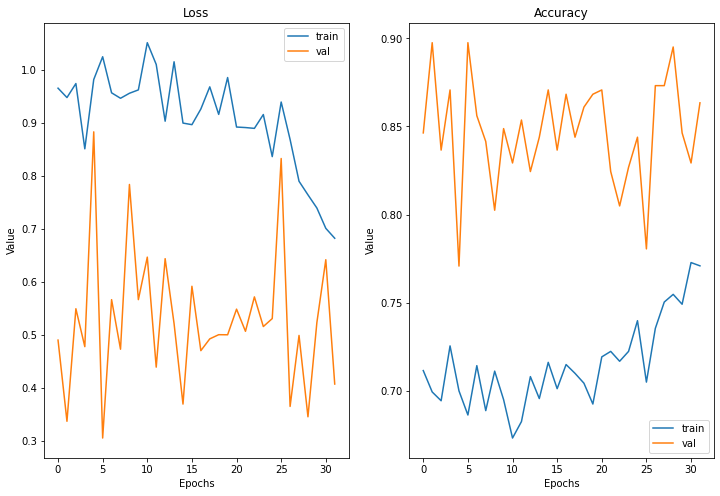

model_4
-------------------------------------------------------------------------------------------------------------------------
Epoch 1/500
51/51 [==============================] - 3s 54ms/step - loss: 1.0396 - accuracy: 0.6679 - val_loss: 0.7182 - val_accuracy: 0.8073 - lr: 0.0010
Epoch 2/500
51/51 [==============================] - 2s 47ms/step - loss: 0.9887 - accuracy: 0.6868 - val_loss: 0.3776 - val_accuracy: 0.8805 - lr: 0.0010
Epoch 3/500
51/51 [==============================] - 2s 42ms/step - loss: 0.9224 - accuracy: 0.7055 - val_loss: 0.6644 - val_accuracy: 0.8268 - lr: 0.0010
Epoch 4/500
51/51 [==============================] - 2s 42ms/step - loss: 0.9490 - accuracy: 0.7117 - val_loss: 0.4496 - val_accuracy: 0.8585 - lr: 0.0010
Epoch 5/500
51/51 [==============================] - 2s 42ms/step - loss: 1.0303 - accuracy: 0.6837 - val_loss: 0.4714 - val_accuracy: 0.8463 - lr: 0.0010
Epoch 6/500
51/51 [==============================] - 2s 42ms/step - loss: 0.9077 - accuracy: 0.

Epoch 52/500
51/51 [==============================] - 2s 42ms/step - loss: 0.5802 - accuracy: 0.8026 - val_loss: 0.5263 - val_accuracy: 0.8561 - lr: 4.9000e-04
Epoch 53/500
51/51 [==============================] - 2s 42ms/step - loss: 0.5707 - accuracy: 0.8156 - val_loss: 0.4359 - val_accuracy: 0.8537 - lr: 4.9000e-04
Epoch 54/500
51/51 [==============================] - 2s 42ms/step - loss: 0.5369 - accuracy: 0.8257 - val_loss: 0.4172 - val_accuracy: 0.8707 - lr: 4.9000e-04
Epoch 55/500
51/51 [==============================] - 2s 42ms/step - loss: 0.5991 - accuracy: 0.8057 - val_loss: 0.3764 - val_accuracy: 0.8878 - lr: 4.9000e-04
Epoch 56/500
51/51 [==============================] - 2s 43ms/step - loss: 0.5482 - accuracy: 0.8232 - val_loss: 0.4849 - val_accuracy: 0.8463 - lr: 4.9000e-04


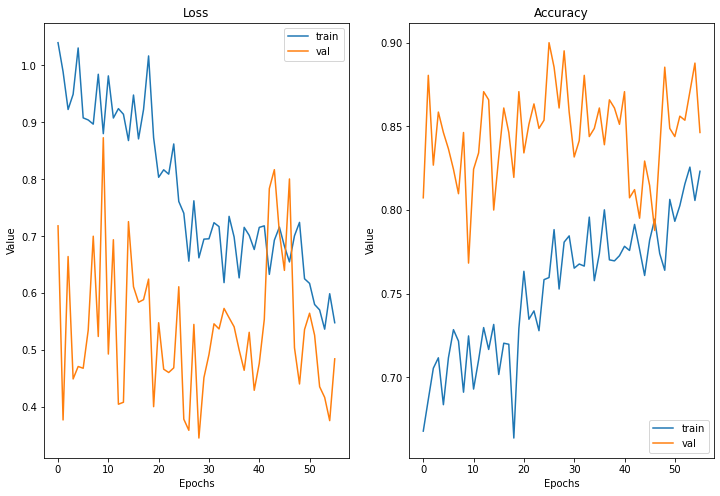

model_5
-------------------------------------------------------------------------------------------------------------------------
Epoch 1/500
51/51 [==============================] - 3s 54ms/step - loss: 0.9499 - accuracy: 0.7083 - val_loss: 0.4872 - val_accuracy: 0.8341 - lr: 0.0010
Epoch 2/500
51/51 [==============================] - 2s 48ms/step - loss: 0.9446 - accuracy: 0.6918 - val_loss: 0.4716 - val_accuracy: 0.8634 - lr: 0.0010
Epoch 3/500
51/51 [==============================] - 2s 42ms/step - loss: 0.8585 - accuracy: 0.7453 - val_loss: 0.5294 - val_accuracy: 0.8390 - lr: 0.0010
Epoch 4/500
51/51 [==============================] - 2s 42ms/step - loss: 0.9610 - accuracy: 0.7049 - val_loss: 0.4265 - val_accuracy: 0.8439 - lr: 0.0010
Epoch 5/500
51/51 [==============================] - 2s 42ms/step - loss: 1.0537 - accuracy: 0.6712 - val_loss: 0.5331 - val_accuracy: 0.8366 - lr: 0.0010
Epoch 6/500
51/51 [==============================] - 2s 42ms/step - loss: 0.9638 - accuracy: 0.

51/51 [==============================] - 2s 42ms/step - loss: 0.6392 - accuracy: 0.7889 - val_loss: 0.3503 - val_accuracy: 0.8780 - lr: 7.0000e-04
Epoch 53/500
51/51 [==============================] - 2s 43ms/step - loss: 0.6865 - accuracy: 0.7770 - val_loss: 0.5345 - val_accuracy: 0.8463 - lr: 7.0000e-04
Epoch 54/500
51/51 [==============================] - 2s 43ms/step - loss: 0.6114 - accuracy: 0.8014 - val_loss: 0.3016 - val_accuracy: 0.8878 - lr: 7.0000e-04
Epoch 55/500
51/51 [==============================] - 2s 42ms/step - loss: 0.6679 - accuracy: 0.7765 - val_loss: 0.4706 - val_accuracy: 0.8512 - lr: 7.0000e-04
Epoch 56/500
51/51 [==============================] - 2s 42ms/step - loss: 0.5656 - accuracy: 0.8132 - val_loss: 0.4424 - val_accuracy: 0.8707 - lr: 7.0000e-04
Epoch 57/500
51/51 [==============================] - 2s 42ms/step - loss: 0.6152 - accuracy: 0.8157 - val_loss: 0.4702 - val_accuracy: 0.8756 - lr: 7.0000e-04
Epoch 58/500
51/51 [==============================] -

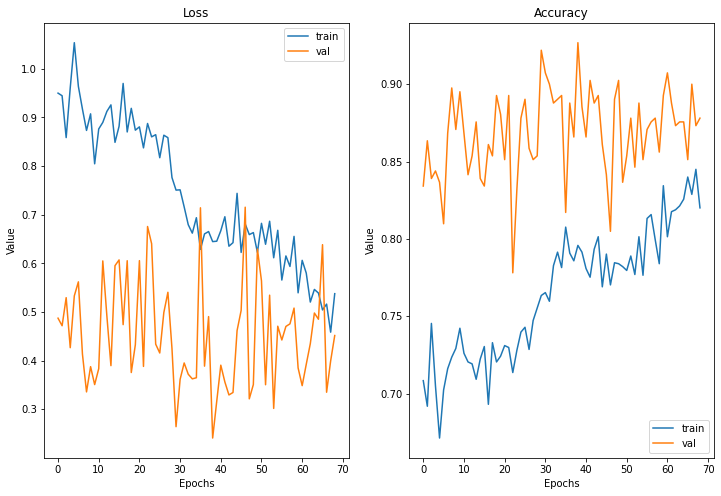

model_6
-------------------------------------------------------------------------------------------------------------------------
Epoch 1/500
51/51 [==============================] - 3s 55ms/step - loss: 0.8646 - accuracy: 0.7402 - val_loss: 0.3934 - val_accuracy: 0.8902 - lr: 0.0010
Epoch 2/500
51/51 [==============================] - 2s 43ms/step - loss: 0.8112 - accuracy: 0.7435 - val_loss: 0.4766 - val_accuracy: 0.8512 - lr: 0.0010
Epoch 3/500
51/51 [==============================] - 2s 42ms/step - loss: 0.8119 - accuracy: 0.7572 - val_loss: 0.5477 - val_accuracy: 0.8585 - lr: 0.0010
Epoch 4/500
51/51 [==============================] - 2s 42ms/step - loss: 0.7932 - accuracy: 0.7379 - val_loss: 0.4826 - val_accuracy: 0.8707 - lr: 0.0010
Epoch 5/500
51/51 [==============================] - 2s 41ms/step - loss: 0.8780 - accuracy: 0.7354 - val_loss: 0.8320 - val_accuracy: 0.7927 - lr: 0.0010
Epoch 6/500
51/51 [==============================] - 2s 41ms/step - loss: 0.8252 - accuracy: 0.

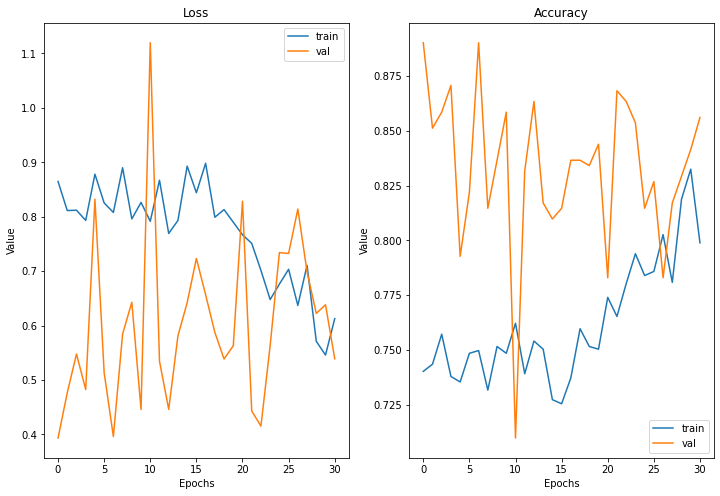

model_7
-------------------------------------------------------------------------------------------------------------------------
Epoch 1/500
51/51 [==============================] - 3s 57ms/step - loss: 0.8671 - accuracy: 0.7292 - val_loss: 0.5229 - val_accuracy: 0.8439 - lr: 0.0010
Epoch 2/500
51/51 [==============================] - 2s 45ms/step - loss: 0.8135 - accuracy: 0.7441 - val_loss: 0.6460 - val_accuracy: 0.8439 - lr: 0.0010
Epoch 3/500
51/51 [==============================] - 3s 49ms/step - loss: 0.9022 - accuracy: 0.7273 - val_loss: 0.3358 - val_accuracy: 0.8878 - lr: 0.0010
Epoch 4/500
51/51 [==============================] - 3s 50ms/step - loss: 0.8258 - accuracy: 0.7416 - val_loss: 0.3452 - val_accuracy: 0.9049 - lr: 0.0010
Epoch 5/500
51/51 [==============================] - 2s 44ms/step - loss: 0.8484 - accuracy: 0.7435 - val_loss: 0.5040 - val_accuracy: 0.8366 - lr: 0.0010
Epoch 6/500
51/51 [==============================] - 2s 43ms/step - loss: 0.8419 - accuracy: 0.

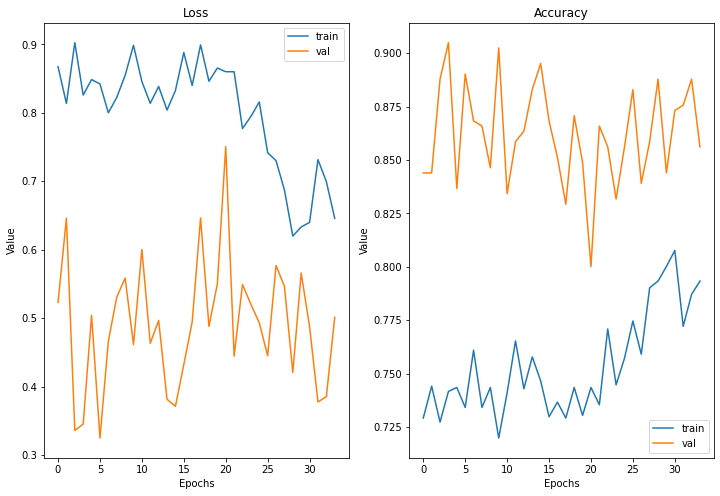

model_8
-------------------------------------------------------------------------------------------------------------------------
Epoch 1/500
51/51 [==============================] - 3s 56ms/step - loss: 0.8768 - accuracy: 0.7292 - val_loss: 0.7519 - val_accuracy: 0.7902 - lr: 0.0010
Epoch 2/500
51/51 [==============================] - 2s 49ms/step - loss: 0.8513 - accuracy: 0.7385 - val_loss: 0.7271 - val_accuracy: 0.8341 - lr: 0.0010
Epoch 3/500
51/51 [==============================] - 2s 48ms/step - loss: 0.8508 - accuracy: 0.7478 - val_loss: 0.5283 - val_accuracy: 0.8463 - lr: 0.0010
Epoch 4/500
51/51 [==============================] - 2s 48ms/step - loss: 0.8714 - accuracy: 0.7316 - val_loss: 0.5202 - val_accuracy: 0.8732 - lr: 0.0010
Epoch 5/500
51/51 [==============================] - 2s 42ms/step - loss: 0.9109 - accuracy: 0.7186 - val_loss: 0.8148 - val_accuracy: 0.7951 - lr: 0.0010
Epoch 6/500
51/51 [==============================] - 2s 42ms/step - loss: 0.7742 - accuracy: 0.

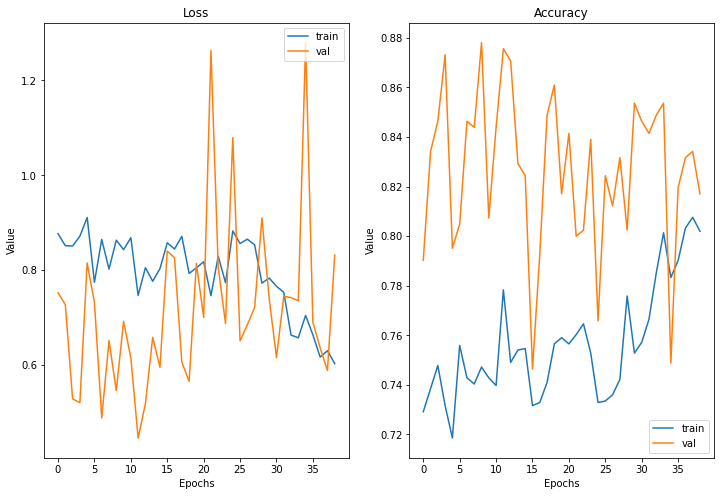

model_9
-------------------------------------------------------------------------------------------------------------------------
Epoch 1/500
51/51 [==============================] - 3s 54ms/step - loss: 0.9825 - accuracy: 0.7169 - val_loss: 0.4231 - val_accuracy: 0.8561 - lr: 0.0010
Epoch 2/500
51/51 [==============================] - 2s 48ms/step - loss: 0.8137 - accuracy: 0.7491 - val_loss: 0.4661 - val_accuracy: 0.8634 - lr: 0.0010
Epoch 3/500
51/51 [==============================] - 2s 47ms/step - loss: 0.8542 - accuracy: 0.7291 - val_loss: 0.3863 - val_accuracy: 0.8780 - lr: 0.0010
Epoch 4/500
51/51 [==============================] - 2s 42ms/step - loss: 0.8213 - accuracy: 0.7559 - val_loss: 0.6149 - val_accuracy: 0.8610 - lr: 0.0010
Epoch 5/500
51/51 [==============================] - 2s 47ms/step - loss: 0.8696 - accuracy: 0.7310 - val_loss: 0.3492 - val_accuracy: 0.8927 - lr: 0.0010
Epoch 6/500
51/51 [==============================] - 2s 42ms/step - loss: 0.7942 - accuracy: 0.

51/51 [==============================] - 2s 46ms/step - loss: 0.5099 - accuracy: 0.8362 - val_loss: 0.4750 - val_accuracy: 0.8659 - lr: 4.9000e-04
Epoch 53/500
51/51 [==============================] - 2s 44ms/step - loss: 0.5117 - accuracy: 0.8407 - val_loss: 0.6393 - val_accuracy: 0.8561 - lr: 4.9000e-04
Epoch 54/500
51/51 [==============================] - 2s 43ms/step - loss: 0.5193 - accuracy: 0.8356 - val_loss: 0.6722 - val_accuracy: 0.8366 - lr: 4.9000e-04
Epoch 55/500
51/51 [==============================] - 2s 42ms/step - loss: 0.4875 - accuracy: 0.8456 - val_loss: 0.6578 - val_accuracy: 0.8415 - lr: 4.9000e-04
Epoch 56/500
51/51 [==============================] - 2s 44ms/step - loss: 0.4764 - accuracy: 0.8437 - val_loss: 0.5996 - val_accuracy: 0.8585 - lr: 4.9000e-04
Epoch 57/500
51/51 [==============================] - 2s 43ms/step - loss: 0.4667 - accuracy: 0.8425 - val_loss: 0.6337 - val_accuracy: 0.8585 - lr: 4.9000e-04
Epoch 58/500
51/51 [==============================] -

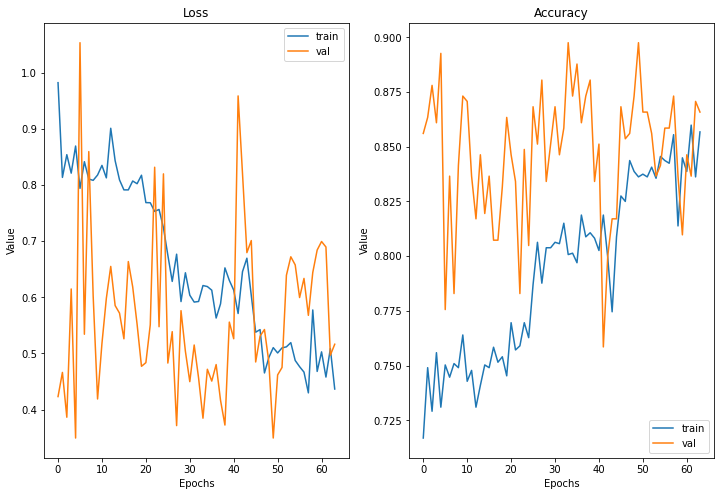

model_10
-------------------------------------------------------------------------------------------------------------------------
Epoch 1/500
51/51 [==============================] - 3s 55ms/step - loss: 0.7501 - accuracy: 0.7727 - val_loss: 0.3716 - val_accuracy: 0.9098 - lr: 0.0010
Epoch 2/500
51/51 [==============================] - 2s 45ms/step - loss: 0.7536 - accuracy: 0.7665 - val_loss: 0.4891 - val_accuracy: 0.8585 - lr: 0.0010
Epoch 3/500
51/51 [==============================] - 2s 43ms/step - loss: 0.7784 - accuracy: 0.7547 - val_loss: 1.0961 - val_accuracy: 0.7707 - lr: 0.0010
Epoch 4/500
51/51 [==============================] - 2s 44ms/step - loss: 0.7883 - accuracy: 0.7640 - val_loss: 0.5658 - val_accuracy: 0.8341 - lr: 0.0010
Epoch 5/500
51/51 [==============================] - 2s 44ms/step - loss: 0.7649 - accuracy: 0.7702 - val_loss: 0.5777 - val_accuracy: 0.8341 - lr: 0.0010
Epoch 6/500
51/51 [==============================] - 2s 44ms/step - loss: 0.7400 - accuracy: 0

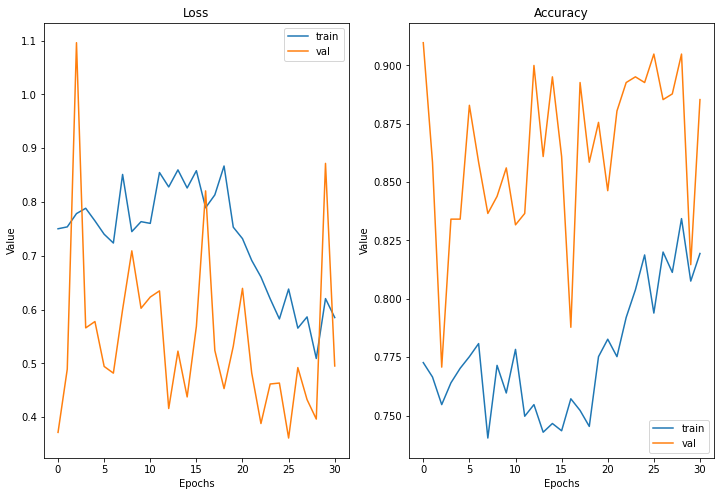

In [40]:
for idx in range(num_model):
    print("model_{}".format(idx+1))
    print("-------------------------------------------------------------------------------------------------------------------------")
    X_train, X_valid, y_train, y_valid = train_test_split(X_trains, y_trains, test_size=0.2, stratify=train['digit'])
    X_train = X_train/255.0
    X_valid = X_valid/255.
    
    model = None
    model = Model(inputs= [input_], outputs=[output])
    
    model.compile(loss='categorical_crossentropy', optimizer=Adam(
    lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07), metrics=['accuracy'])
    
    checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
        "model/test2_{}.h5".format(idx), save_best_only=True, monitor='val_accuracy', mode='auto')
    
    lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.7, patience=30)
    
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 40, restore_best_weights = True)
    
    history = model.fit_generator(datagen.flow(X_train, y_train, shuffle=True, batch_size=batch_size),
                                  epochs=epochs, validation_data=(
                                      X_valid, y_valid),
                                  verbose=1,
                                 steps_per_epoch=X_train.shape[0] // batch_size,
                                  validation_steps=X_valid.shape[0] //batch_size,
                                  callbacks=[checkpoint_cb, early_stopping, lr_scheduler]
                                  )
    plot_curve(history.epoch, history.history, ['loss', 'val_loss', 'accuracy', 'val_accuracy'])

In [41]:
# history = cnn_model.fit_generator(datagen.flow(X_train, y_train, shuffle=True, batch_size=batch_size),
#                                   epochs=epochs, validation_data=(
#                                       X_valid, y_valid),
#                                   verbose=1,
#                                  steps_per_epoch=X_train.shape[0] // batch_size,
#                                   validation_steps=X_valid.shape[0] //batch_size,
#                                   callbacks=[checkpoint_cb, lr_scheduler]
#                                   )

## Predict

In [42]:
X_test = X_test/255.0

In [43]:
best_model_list = []
for i in range(num_model):
    best = tf.keras.models.load_model('model/test2_{}.h5'.format(i))
    best_model_list.append(best)

In [44]:
result_list = []

for idx, model in enumerate(best_model_list):
    result = model.evaluate(X_valid, y_valid)
    print("model_{}_acc : {}".format(idx+1, result))

13/13 [==============================] - 18s 1s/step - loss: 0.2481 - accuracy: 0.9317
model_1_acc : [0.24806848168373108, 0.9317073225975037]
13/13 [==============================] - 0s 12ms/step - loss: 0.3813 - accuracy: 0.8927
model_2_acc : [0.3812630772590637, 0.8926829099655151]
13/13 [==============================] - 0s 11ms/step - loss: 0.4642 - accuracy: 0.8780
model_3_acc : [0.4641992449760437, 0.8780487775802612]
13/13 [==============================] - 0s 10ms/step - loss: 0.2700 - accuracy: 0.9293
model_4_acc : [0.26997700333595276, 0.9292683005332947]
13/13 [==============================] - 0s 11ms/step - loss: 0.1785 - accuracy: 0.9341
model_5_acc : [0.1784595251083374, 0.9341463446617126]
13/13 [==============================] - 0s 11ms/step - loss: 0.3583 - accuracy: 0.8976
model_6_acc : [0.3582833707332611, 0.8975609540939331]
13/13 [==============================] - 0s 11ms/step - loss: 0.3402 - accuracy: 0.9024
model_7_acc : [0.34021905064582825, 0.902438998222351

In [45]:
pred_list = []
for idx, model in enumerate(best_model_list):
    pred = model.predict(X_test)
    pred_list.append(pred)

In [46]:
len(pred_list[0][0])

10

In [47]:
final_pred = np.array([0]*204800).reshape(20480, 10).astype('float64')
for pred in pred_list:
    final_pred += pred
final_pred = np.argmax(final_pred, axis=1)

In [48]:
final_pred

array([6, 9, 8, ..., 6, 8, 0])

In [49]:
# plot_curve(epochs, history.history, ['loss', 'val_loss', 'accuracy', 'val_accuracy'])

In [50]:
# acc = history.history['val_accuracy']
# best = np.max(acc)
# print(best)

In [51]:
# best_model = tf.keras.models.load_model('EE.h5')

In [52]:
# result = best_model.predict(X_test)

In [53]:
# X_valid_digit = X_valid_digit / 255.0
# # 255 나누기
# # digit image
# # alpabet one hot

In [54]:
submission['digit'] = final_pred

In [55]:
submission

,id,digit
0,2049,6
1,2050,9
2,2051,8
3,2052,0
4,2053,3
...,...,...
20475,22524,4
20476,22525,1
20477,22526,6
20478,22527,8


In [56]:
# result = np.argmax(result, axis=1)

In [58]:
submission.to_csv('./submission/rexnet_ensemble_submission.csv', index=False)